In [12]:
import random
import matplotlib.pyplot as plt
from scipy.io import savemat
import numpy as np
import scipy
from scipy.io import savemat,loadmat

def point_on_triangle(pt1, pt2, pt3):
    """
    Random point on the triangle with vertices pt1, pt2 and pt3.
    """
    s, t = sorted([random.random(), random.random()])
    return (s * pt1[0] + (t-s)*pt2[0] + (1-t)*pt3[0],
            s * pt1[1] + (t-s)*pt2[1] + (1-t)*pt3[1])


In [13]:
X=[4.8478,3.7654,2.2346,1.1522,1.1522,2.2346,3.7654,4.8478]
Y=[4.5154,5.5978,5.5978,4.5154,2.9846,1.9022,1.9022,2.9846]

Mx=[3.2121,3.0,2.7878,2.7,2.7878,3.0,3.2121,3.3]
My=[3.96,4.05,3.96,3.75,3.53,3.45,3.53,3.75]



In [14]:
points1=[]
M = np.zeros(shape=(8,50))
k=0
for i in range(7):
    pt1 = (X[i], Y[i])
    pt2 = (X[k+1], Y[k+1])
    pt3 = (Mx[i], My[i])
    points = [point_on_triangle(pt1, pt2, pt3) for _ in range(1000)]
    points1.append(points)
    k=k+1

pt1 = (X[7], Y[7])
pt2 = (X[0], Y[0])
pt3 = (Mx[7], My[7])
points = [point_on_triangle(pt1, pt2, pt3) for _ in range(1000)]
points1.append(points)






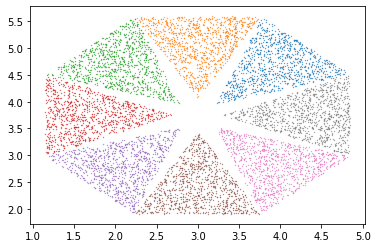

In [15]:
for i in points1:
    x, y = zip(*i)
    plt.scatter(x, y, s=0.1)
plt.show()

In [16]:
a = np.empty((8, 0)).tolist()
y = np.array([1,0,0,0,0,0,0,0])
for i in range(8):
    for k in range(50):
        a[i].append(y)
    y=np.roll(y,1)

In [17]:
regions = ['R0','R1','R2','R3','R4','R5','R6','R7']
dictp = {i: [] for i in regions}
dictr = {i: [] for i in regions}

k=0
for i in regions:
    if (i=='R7'):
        break
    else:
        for o in range(50):
            pt1 = (X[k], Y[k])
            pt2 = (X[k+1], Y[k+1])
            pt3 = (Mx[k], My[k])
            points = point_on_triangle(pt1, pt2, pt3)
            dictp[i].append(points)
    k=k+1
        
for o in range(50):
    pt1 = (X[7], Y[7])
    pt2 = (X[0], Y[0])
    pt3 = (Mx[7], My[7])
    points = point_on_triangle(pt1, pt2, pt3)
    dictp['R7'].append(points)

scipy.io.savemat('outRegions.mat', dictr)
scipy.io.savemat('outCoordinates.mat', dictp)

d1 = scipy.io.loadmat('outRegions.mat')



In [18]:
d1


{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Jun  8 21:52:17 2021',
 '__version__': '1.0',
 '__globals__': [],
 'R0': array([], shape=(0, 0), dtype=float64),
 'R1': array([], shape=(0, 0), dtype=float64),
 'R2': array([], shape=(0, 0), dtype=float64),
 'R3': array([], shape=(0, 0), dtype=float64),
 'R4': array([], shape=(0, 0), dtype=float64),
 'R5': array([], shape=(0, 0), dtype=float64),
 'R6': array([], shape=(0, 0), dtype=float64),
 'R7': array([], shape=(0, 0), dtype=float64)}